In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

%config InlineBackend.figure_format='retina'

# Problem 3

$$
\begin{pmatrix}
  A_{11} & A_{1*}\\
  A_{*1} & A_{\bar{1}\bar{1}}
\end{pmatrix} =
\begin{pmatrix}
  1 & 0\\
  \frac{A_{*1}}{A_{11}} & L_{\bar{1}\bar{1}}
\end{pmatrix}
\begin{pmatrix}
  A_{11} & A_{1*}\\
  0 & U_{\bar{1}\bar{1}}
\end{pmatrix} \Rightarrow L_{\bar{1}\bar{1}} U_{\bar{1}\bar{1}} + \frac{1}{A_{11}} A_{\star 1} A_{1 \star} = A_{\bar{1}\bar{1}}
$$

Ok. Obvious in-place algorithm. Can break though if $A_{ii} = 0$, pivoting is needed.

In [2]:
def in_place_LU(A):
    m, n = A.shape
    for i in range(min(m, n)-1):
        A[(i+1):, i] = A[(i+1):, i] / A[i, i]
        A[(i+1):, (i+1):] = A[(i+1):, (i+1):] - np.outer(A[(i+1):, i], A[i, (i+1):])
    L = np.tril(A, k=-1) + np.eye(*A.shape)
    U = np.triu(A)
    if m <= n:
        L = L[:, :m]
    else:
        U = U[:n]
    return L, U

def solve_lower_triangular(L, b):
    # assuming square matrix
    x = np.zeros_like(b)
    for i in range(x.shape[0]):
        x[i] = (b[i] - np.sum(x[:i] * L[i, :i])) / L[i, i]
    return x

def solve_upper_triangular(U, b):
    # assuming square matrix
    x = np.zeros_like(b)
    for i in range(x.shape[0]-1, -1, -1):
        x[i] = (b[i] - np.sum(x[(i+1):] * U[i, (i+1):])) / U[i, i]
    return x

## LU tests

A shape (3, 7)
LU ok? True


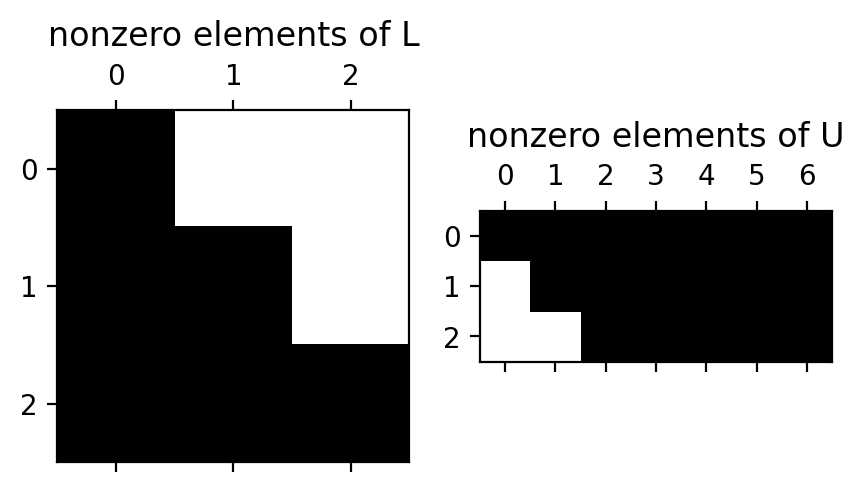

In [3]:
np.random.seed(44)
A = np.random.randn(7, 3)
A = (A @ A.T)[:3, :7]
A_ = np.copy(A)
L, U = in_place_LU(A_)

print("A shape", A.shape)
print("LU ok?", np.allclose(L @ U, A))

fig, ax = plt.subplots(1, 2, figsize=(5, 3))

ax[0].spy(L)
ax[1].spy(U)
ax[0].set_title("nonzero elements of L")
ax[1].set_title("nonzero elements of U");

A shape (7, 4)
LU ok? True


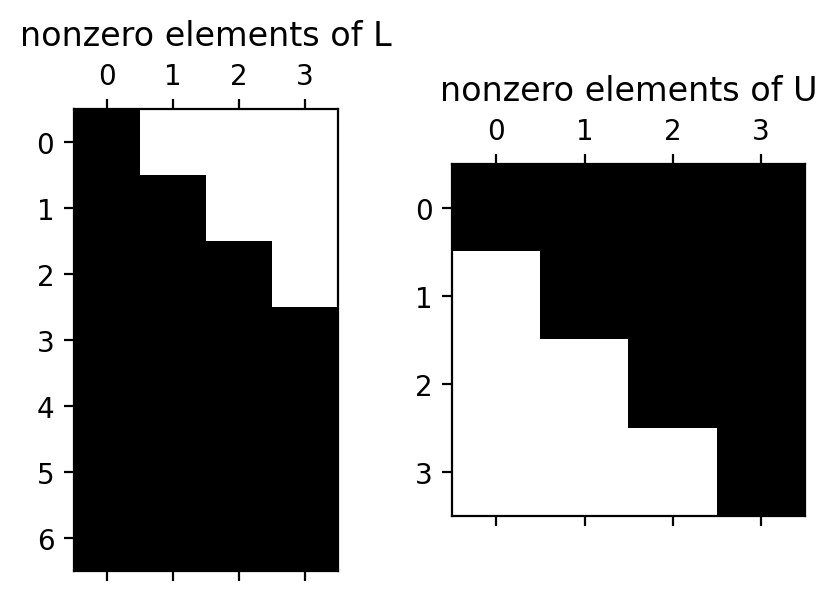

In [4]:
np.random.seed(44)
A = np.random.randn(7, 3)
A = (A @ A.T)[:7, :4]
A_ = np.copy(A)
L, U = in_place_LU(A_)

print("A shape", A.shape)
print("LU ok?", np.allclose(L @ U, A))

fig, ax = plt.subplots(1, 2, figsize=(5, 3))

ax[0].spy(L)
ax[1].spy(U)
ax[0].set_title("nonzero elements of L")
ax[1].set_title("nonzero elements of U");

A shape (7, 7)
LU ok? True


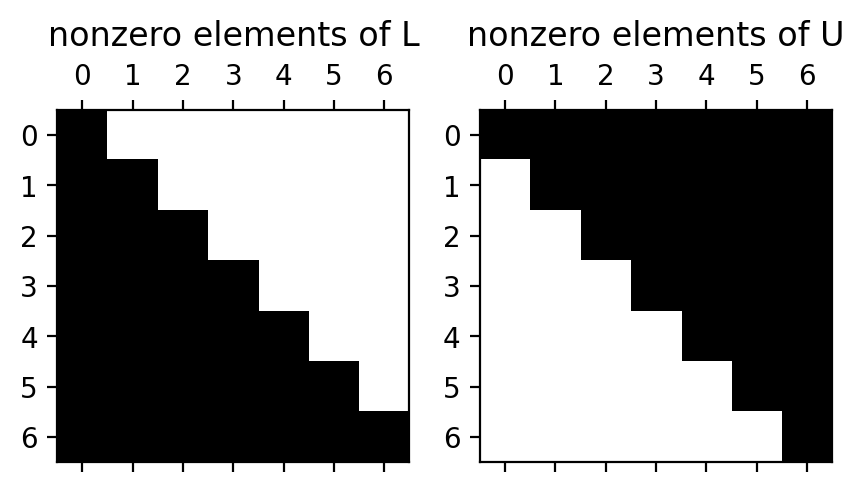

In [5]:
np.random.seed(44)
A = np.random.randn(7, 7)
A = (A @ A.T)
A_ = np.copy(A)
L, U = in_place_LU(A_)

print("A shape", A.shape)
print("LU ok?", np.allclose(L @ U, A))

fig, ax = plt.subplots(1, 2, figsize=(5, 3))

ax[0].spy(L)
ax[1].spy(U)
ax[0].set_title("nonzero elements of L")
ax[1].set_title("nonzero elements of U");

## LU solve test

In [6]:
np.random.seed(44)
A = np.random.randn(7, 7)
A = (A @ A.T)
solution = np.random.randn(7)
b = A @ solution
A_ = np.copy(A)
L, U = in_place_LU(A_)

z = solve_lower_triangular(L, b)
solution_ = solve_upper_triangular(U, z)

print("Solution ok?", np.allclose(solution_, solution))

Solution ok? True


## Solving linear system from Problem 1 (Sauer, Exercise 4a, page 85)

In [7]:
A = np.array([
    [3, 1, 2],
    [6, 3, 4],
    [3, 1, 5]
])

A_ = np.copy(A)
b = np.array([0, 1, 3])
L, U = in_place_LU(A_)
z = solve_lower_triangular(L, b)
solution_ = solve_upper_triangular(U, z)
print("solution", solution_)
print("residual", b - A @ solution_)

solution [-1  1  1]
residual [0 0 0]


# Problem 4

In [8]:
def get_random_normalised_vectors():
    v = np.random.randn(4, 4)
    v = v / np.linalg.norm(v, axis=0, keepdims=True)
    return v

def get_colume(v):
    v_ = np.copy(v)
    L, U = in_place_LU(v_)
    vol = np.abs(np.prod(np.diag(U))) # det(L) = 1
    return vol

def get_condition_number(v):
    # free to use anything here
    singular_values = np.linalg.svd(v, compute_uv=False)
    cond = np.max(singular_values) / np.min(singular_values)
    return cond

maximal volume 0.892810123225531 corresponding condition number 1.6046115371313003
minimal volume 0.0005328770788677224 corresponding condition number 3295.057101840398


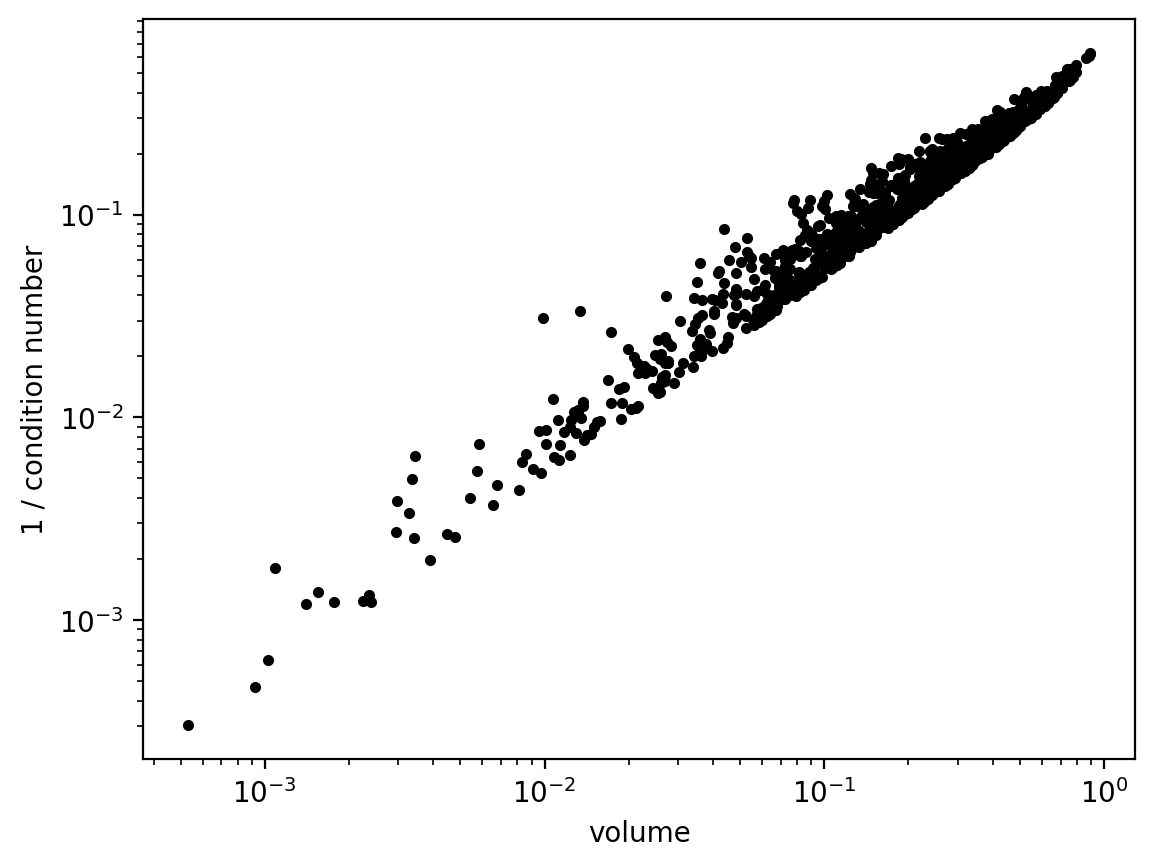

In [9]:
N_trials = 1000
np.random.seed(336)

conds, vols = [], []
for _ in range(1000):
    v = get_random_normalised_vectors()
    cond = get_condition_number(v)
    vol = get_colume(v)
    conds.append(cond)
    vols.append(vol)
conds = np.array(conds)
vols = np.array(vols)

plt.plot(vols, 1/conds, ".", color="black")
plt.xlabel("volume")
plt.ylabel("1 / condition number")
plt.xscale("log")
plt.yscale("log")

print("maximal volume", np.max(vols), "corresponding condition number", conds[np.argsort(vols)[-1]])
print("minimal volume", np.min(vols), "corresponding condition number", conds[np.argsort(vols)[0]]);

**Explanation**

For normalised vectors their volume is maximal if they form hypercube. In this case there is a system of coordinates where matrix is diagonal, so all singular values equal $1$ and ocndition number equals $1$ too. This is a well-conditioned case. We observe maximal volume $0.89$ with pretty good condition number $1.6$.


Minimal volume $0$ is attained if two vectors coinside. In this case matrix does not have a full rank, so there is zero singular value which gives condition number of $+\infty$.

# Problem 6

In [10]:
def get_cauchy_matrix(v):
    C = 1 / (np.expand_dims(v, 0) + np.expand_dims(v, 1))
    return C

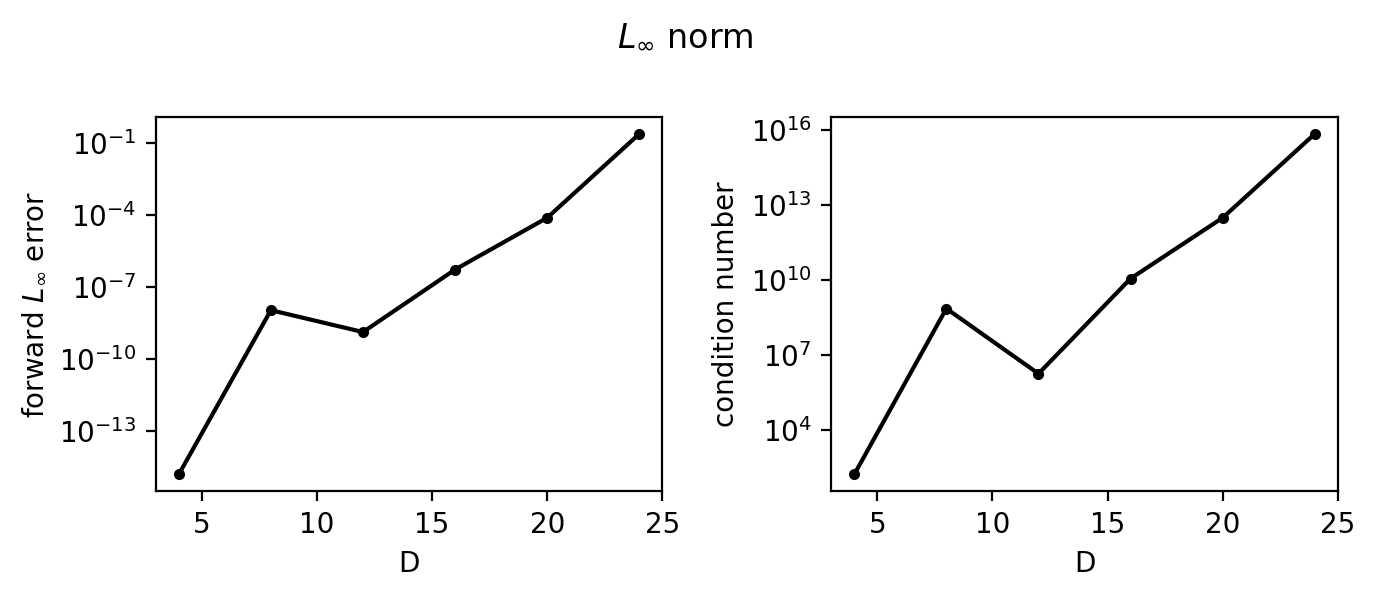

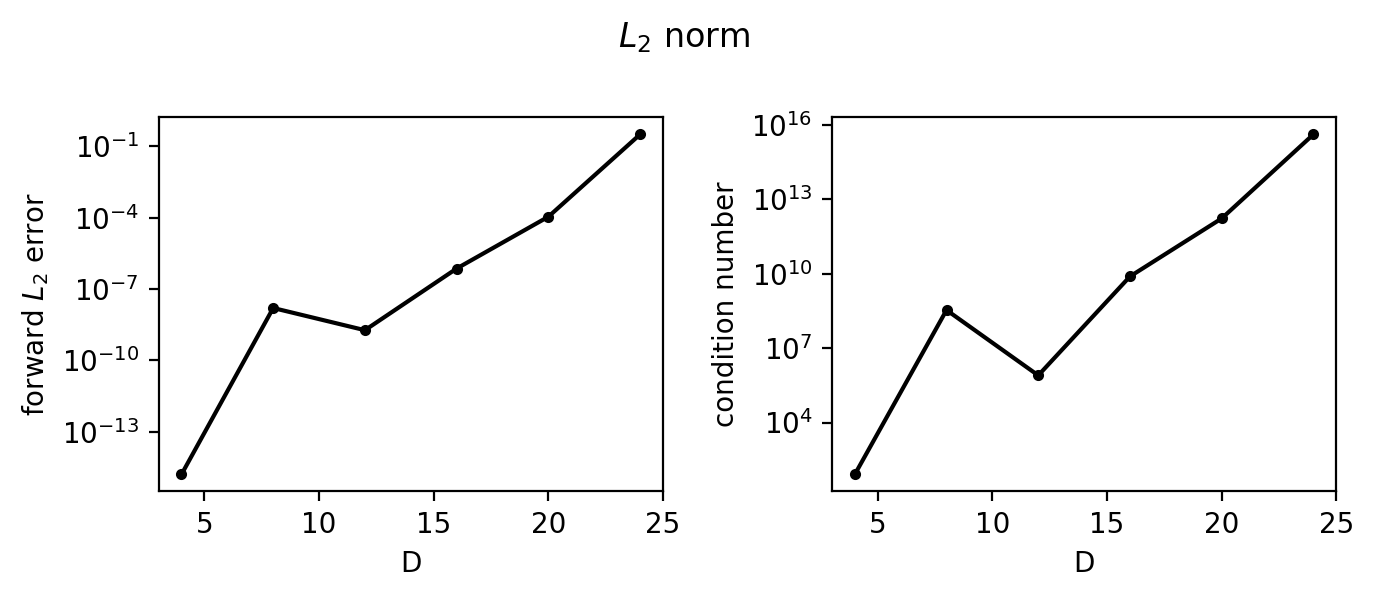

In [11]:
Ds = [4, 8, 12, 16, 20, 24]
np.random.seed(323)
errors_2, errors_inf, condition_numbers_2, condition_numbers_inf = [], [], [], []
for D in Ds:
    z_exact = np.ones(D)
    v = np.random.randn(D)
    C = get_cauchy_matrix(v)
    C_ = np.copy(C)
    b = C @ z_exact

    cond_2 = get_condition_number(C)
    cond_inf = np.linalg.cond(C, p=np.inf)
    L, U = in_place_LU(C_)
    z_approximate = solve_lower_triangular(L, b)
    z_approximate = solve_upper_triangular(U, z_approximate)
    forward_error_inf = np.linalg.norm(z_approximate - z_exact, ord=np.inf)
    forward_error_2 = np.linalg.norm(z_approximate - z_exact, ord=2)
    errors_inf.append(forward_error_inf)
    condition_numbers_inf.append(cond_inf)
    errors_2.append(forward_error_2)
    condition_numbers_2.append(cond_2)

errors_inf = np.array(errors_inf)
condition_numbers_inf = np.array(condition_numbers_inf)
errors_2 = np.array(errors_2)
condition_numbers_2 = np.array(condition_numbers_2)

fig, ax = plt.subplots(1, 2, figsize=(7, 3))
ax[0].plot(Ds, errors_inf, ".-", color="black")
ax[1].plot(Ds, condition_numbers_inf, ".-", color="black")
ax[0].set_yscale("log")
ax[0].set_xlabel("D")
ax[0].set_ylabel("forward $L_\infty$ error")

ax[1].set_yscale("log")
ax[1].set_xlabel("D")
ax[1].set_ylabel("condition number")

plt.suptitle("$L_{\infty}$ norm")
plt.tight_layout()

fig, ax = plt.subplots(1, 2, figsize=(7, 3))
ax[0].plot(Ds, errors_2, ".-", color="black")
ax[1].plot(Ds, condition_numbers_2, ".-", color="black")
ax[0].set_yscale("log")
ax[0].set_xlabel("D")
ax[0].set_ylabel("forward $L_2$ error")

ax[1].set_yscale("log")
ax[1].set_xlabel("D")
ax[1].set_ylabel("condition number")

plt.suptitle("$L_{2}$ norm")
plt.tight_layout();

**Explanation**


Consider equation $Ax = b$. If we perturb $b$ by $\delta b$ the error between exact solution and the one obtained from the perturbed right-hand side is $\left\|A^{-1} b - (A^{-1}b + A^{-1}\delta b)\right\| = \left\|A^{-1}\delta b\right\|$. So the relative error is
$$
\frac{\left\|A^{-1}\delta b\right\|}{\left\|A^{-1}b\right\|} = \frac{\left\|\delta b\right\|}{\left\|b\right\|}\frac{\left\|A^{-1}\delta b\right\|}{\left\|\delta b\right\|} \frac{\left\|b\right\|}{\left\|A^{-1}b\right\|} \leq \frac{\left\|\delta b\right\|}{\left\|b\right\|} \left(\sup_{\delta_b} \frac{\left\|A^{-1}\delta b\right\|}{\left\|\delta b\right\|}\right) \left(\sup_{b} \frac{\left\|b\right\|}{\left\|A^{-1}b\right\|}\right) = \frac{\left\|\delta b\right\|}{\left\|b\right\|} \left\|A^{-1}\right\| \left\|A\right\| = \frac{\left\|\delta b\right\|}{\left\|b\right\|} \text{cond}(A).
$$

This mean that relative error in the right-hand side of the system is *in the worst case* lead to $\text{cond}(A)$ larger relative error in the solution.

In our case we have Cauchy matrix with rapidly growing condition number. Since we obtained right-hand side from $Az$, we introduced rounding errors. These rounding errors are amplified by huge condition number resulting in a large forward error.

# Problem 8

In [12]:
def get_matrix_rhs_and_exact(n):
    rhs = np.ones(n)
    rhs[0] = rhs[-1] = 2
    A = 3*np.diag(np.ones(n)) - np.diag(np.ones(n-1), k=-1) - np.diag(np.ones(n-1), k=+1)
    x_exact = np.ones(n)
    return A, rhs, x_exact

def Gauss_Seidel_sweep(x, b, A, F, upper=False, w=1.0):
    r = b - A @ x
    if upper:
        x = x + w * solve_upper_triangular(F, r) # function from Problem 3
    else:
        x = x + w * solve_lower_triangular(F, r) # function from Problem 3
    return x

In [13]:
n = 100
A, b, x_exact = get_matrix_rhs_and_exact(n)
L, U = np.tril(A), np.triu(A)

Gauss-Seidel needs 24 to recover 7 correct digits
SOR needs 24 to recover 7 correct digits


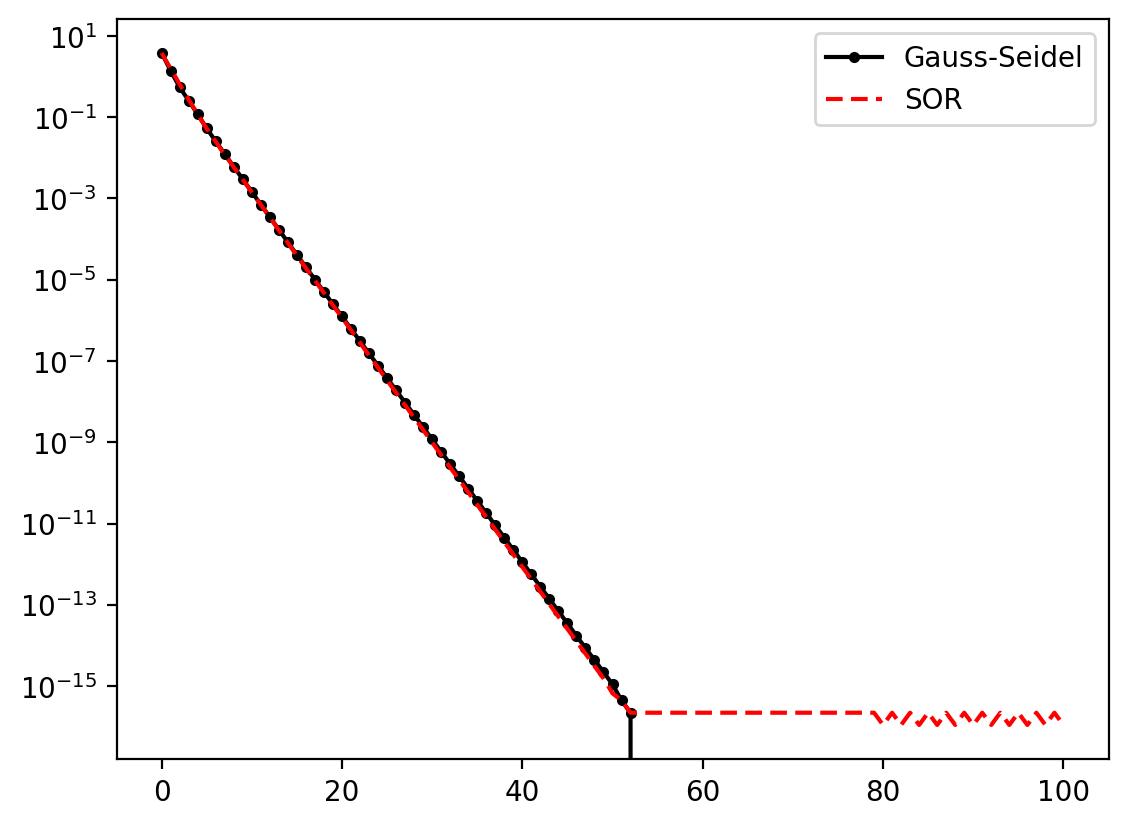

In [14]:
N_it = 100
w = 1.2
np.random.seed(33)
x = np.random.randn(x_exact.shape[0])
errors_GS = [np.linalg.norm(x - x_exact, ord=np.inf)]
residuals_GS = [np.linalg.norm(b - A @ x, ord=np.inf)]

for _ in range(N_it):
    x = Gauss_Seidel_sweep(x, b, A, L)
    errors_GS.append(np.linalg.norm(x - x_exact, ord=np.inf))
    residuals_GS.append(np.linalg.norm(b - A @ x, ord=np.inf))
errors_GS = np.array(errors_GS)

np.random.seed(33)
x = np.random.randn(x_exact.shape[0])
errors_SOR = [np.linalg.norm(x - x_exact, ord=np.inf)]
residuals_SOR = [np.linalg.norm(b - A @ x, ord=np.inf)]

for _ in range(N_it):
    x = Gauss_Seidel_sweep(x, b, A, L, w=w)
    errors_SOR.append(np.linalg.norm(x - x_exact, ord=np.inf))
    residuals_SOR.append(np.linalg.norm(b - A @ x, ord=np.inf))

errors_SOR = np.array(errors_SOR)

print(f"Gauss-Seidel needs {np.argmin(errors_GS >= 1e-7).item()} to recover 7 correct digits")
print(f"SOR needs {np.argmin(errors_SOR >= 1e-7).item()} to recover 7 correct digits")

plt.yscale("log")
plt.plot(errors_GS, ".-", color="black", label="Gauss-Seidel")
plt.plot(errors_SOR, dashes=[4, 2, 4, 2], color="red", label="SOR")
plt.legend();

We observe that $w=1.2$ is not a great value of the parameter. Can we do better?

The optimal relaxation parameter for M-matrices is known. It is based on the spectral radius of Jacobi error reduction matrix
$$
J = I - D^{-1} A = \text{diag}[1/3, 0, 1/3].
$$

Namely, if $\mu = \rho(J)$, optimal $w$ is about $1 + \frac{\mu^2}{4}.$

Gauss-Seidel needs 24 to recover 7 correct digits
optimal SOR needs 21 to recover 7 correct digits


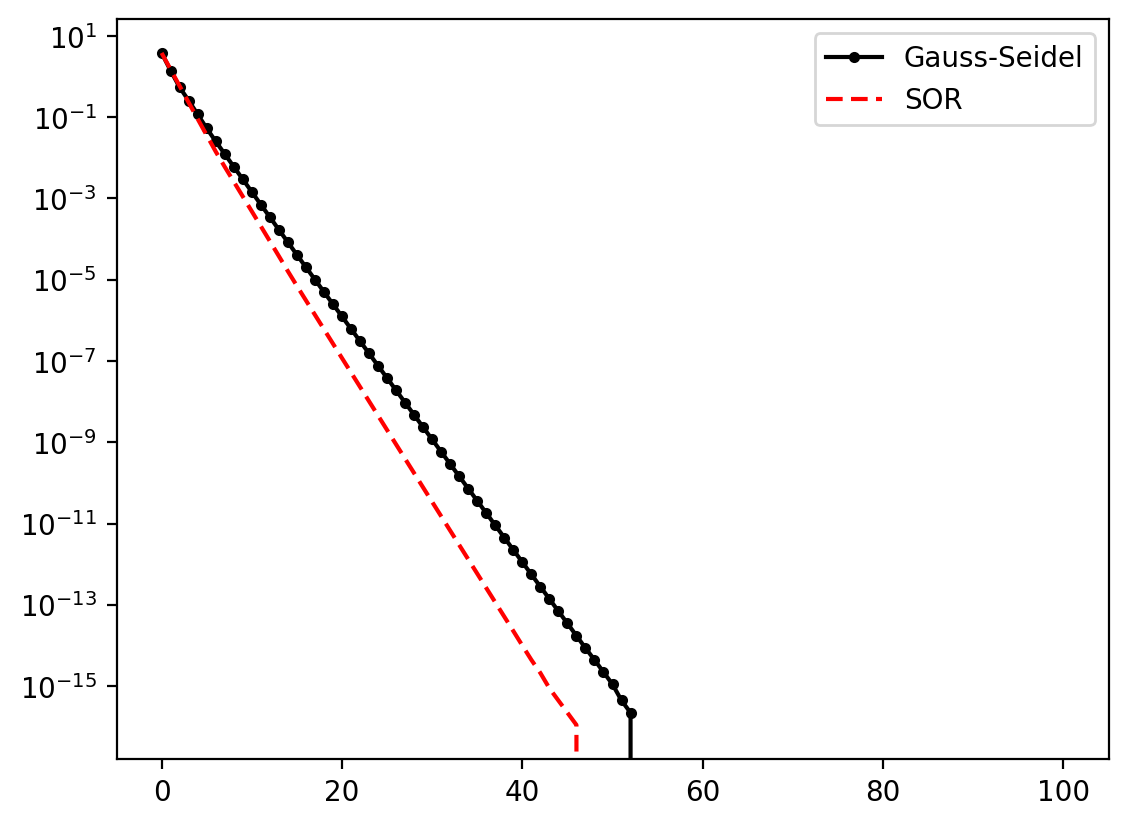

In [15]:
J = np.diag(np.ones(n-1), k=-1)/3 + np.diag(np.ones(n-1), k=+1)/3
mu = np.max(np.abs(np.linalg.eigvals(J)))
w = 1 + mu**2/4

N_it = 100
np.random.seed(33)
x = np.random.randn(x_exact.shape[0])
errors_GS = [np.linalg.norm(x - x_exact, ord=np.inf)]
residuals_GS = [np.linalg.norm(b - A @ x, ord=np.inf)]

for _ in range(N_it):
    x = Gauss_Seidel_sweep(x, b, A, L)
    errors_GS.append(np.linalg.norm(x - x_exact, ord=np.inf))
    residuals_GS.append(np.linalg.norm(b - A @ x, ord=np.inf))
errors_GS = np.array(errors_GS)

np.random.seed(33)
x = np.random.randn(x_exact.shape[0])
errors_SOR = [np.linalg.norm(x - x_exact, ord=np.inf)]
residuals_SOR = [np.linalg.norm(b - A @ x, ord=np.inf)]

for _ in range(N_it):
    x = Gauss_Seidel_sweep(x, b, A, L, w=w)
    errors_SOR.append(np.linalg.norm(x - x_exact, ord=np.inf))
    residuals_SOR.append(np.linalg.norm(b - A @ x, ord=np.inf))

errors_SOR = np.array(errors_SOR)

print(f"Gauss-Seidel needs {np.argmin(errors_GS >= 1e-7).item()} to recover 7 correct digits")
print(f"optimal SOR needs {np.argmin(errors_SOR >= 1e-7).item()} to recover 7 correct digits")

plt.yscale("log")
plt.plot(errors_GS, ".-", color="black", label="Gauss-Seidel")
plt.plot(errors_SOR, dashes=[4, 2, 4, 2], color="red", label="SOR")
plt.legend();

That is marginally better, but since matrix is good already (diagonally dominant) there is no need to tune relaxation parameter.

# Problem 10

In [16]:
def get_vandermonde_matrix(x, deg):
    V = np.stack([x**i for i in range(deg)], axis=1)
    return V

def get_interpolant(x, y, deg):
    V = get_vandermonde_matrix(x, deg)
    Q, R = np.linalg.qr(V)
    c = np.linalg.solve(R, Q.T @ y)
    return c

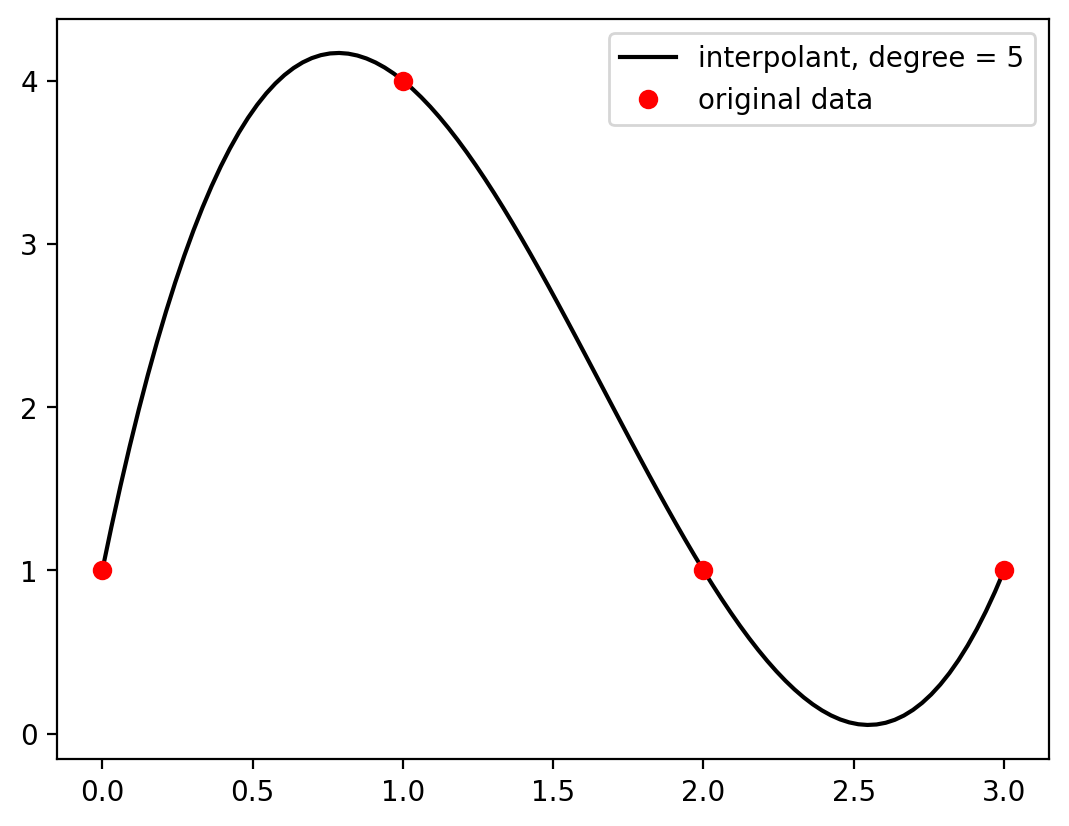

In [17]:
N_interp = 100
x = np.array([0, 1, 2, 3])
y = np.array([1, 4, 1, 1])
x_interp = np.linspace(0, 3, N_interp)

deg = x.shape[0]
V_interp = get_vandermonde_matrix(x_interp, deg)
c = get_interpolant(x, y, deg)
plt.plot(x_interp, V_interp @ c, color="black", label=f"interpolant, degree = {deg+1}")
plt.plot(x, y, "o", color="red", label="original data")
plt.legend();

In [18]:
for n in [5, 10, 15, 20]:
    x = np.linspace(0, 1, n)
    V = get_vandermonde_matrix(x, n)
    cond = np.linalg.cond(V, p=np.inf)
    print(f"n = {n}, l_inf condition number = {cond}")

n = 5, l_inf condition number = 1706.6666666666665
n = 10, l_inf condition number = 48183984.00254816
n = 15, l_inf condition number = 1605542184906.1096
n = 20, l_inf condition number = 5.069855974539305e+16


Condition number is horrendous. Based on that we advise against using any direct method for solving equation $Vc = y$ where $V$ is Vandermonde matrix.

# Problem 12

For simplicity I will use polynomials with degree 3 below. Everything work the same way (on paper) for polynomials of arbitrary degree.

**Newton's polynomial**

If we consider monomial basis (Vandermonde), we approximate data with

$$
p(x) = c_0 + c_1 x + c_2 x^2 + c_3 x^3.
$$

So, having $(x_i, y_i)$ for $i=0,1,2,3$ we can find coefficients from linear system

$$
\begin{pmatrix}
1 & x_0 & x_0^2 & x_0^3 \\
1 & x_1 & x_1^2 & x_1^3 \\
1 & x_2 & x_2^2 & x_2^3 \\
1 & x_3 & x_3^2 & x_3^3
\end{pmatrix}
\begin{pmatrix}
c_0\\
c_1\\
c_2\\
c_3
\end{pmatrix} =
\begin{pmatrix}
y_0\\
y_1\\
y_2\\
y_3
\end{pmatrix}.
$$

As we have seen this sytem does not have great numerical properties.

A better system can be obtained if we change basis and consider polynomial of the form

$$
p(x) = c_0 + c_1 (x - x_0) + c_2 (x - x_0) (x - x_1) + c_3 (x - x_0) (x - x_1) (x - x_2),
$$

which is a Newton polynomial. For this polynomial we need to solve lienar system with lower triangular matrix

$$
\begin{pmatrix}
1 & 0 & 0 & 0 \\
1 & x_1 - x_0 & 0 & 0 \\
1 & x_2 - x_0 & (x_2 - x_0)(x_2 - x_1) & 0 \\
1 & x_3 - x_0 & (x_3 - x_0)(x_3 - x_1) & (x_3 - x_0)(x_3 - x_1)(x_3 - x_2)
\end{pmatrix}
\begin{pmatrix}
c_0\\
c_1\\
c_2\\
c_3
\end{pmatrix} =
\begin{pmatrix}
y_0\\
y_1\\
y_2\\
y_3
\end{pmatrix}.
$$

**Horner's method**

Let's start with a monomial basis (Vandermonde). Suppose we need to evaluate
$$
p(x) = c_0 + c_1 x + c_2 x^2 + c_3 x^3.
$$
This can be done recursively to save FLOPs
$$
p(x) = c_0 + c_1 x + x^2 \underset{p_1}{\left(c_2 + c_3 x\right)} = c_0 + x\underset{p_2}{(c_1 + p_1 x)} = c_0 + p_2 x.
$$

It is easy to see that we can rewrite this process as a solution of lower triangular linear system

$$
\begin{pmatrix}
1 & 0 & 0 & 0\\
-x & 1 & 0 & 0 \\
0 & -x & 1 & 0 \\
0 & 0 & -x & 1
\end{pmatrix}
\begin{pmatrix}
p_0\\
p_1\\
p_2\\
p_3
\end{pmatrix} =
\begin{pmatrix}
c_3\\
c_2\\
c_1\\
c_0
\end{pmatrix},
$$

where $p_3 = p(x)$.

For Newton's basis the polynomial that we will need to evaluate will have a form

$$
p(x) = c_0 + c_1 (x - x_0) + c_2 (x - x_0) (x - x_1) + c_3 (x - x_0) (x - x_1) (x - x_2).
$$

Evidently, not much changes in the algorithm above. We can again write it down using solution to linear system with lower triangular matrix

$$
\begin{pmatrix}
1 & 0 & 0 & 0\\
-(x - x_2) & 1 & 0 & 0 \\
0 & -(x - x_1) & 1 & 0 \\
0 & 0 & -(x - x_0) & 1
\end{pmatrix}
\begin{pmatrix}
p_0\\
p_1\\
p_2\\
p_3
\end{pmatrix} =
\begin{pmatrix}
c_3\\
c_2\\
c_1\\
c_0
\end{pmatrix},
$$

where $p_3 = p(x)$.

In [19]:
def get_Newton_matrix(x):
    columns = [np.ones(x.shape[0]),]
    for i in range(x.shape[0]-1):
        columns.append((x - x[i])*columns[-1])
    N = np.array(columns).T
    N = np.tril(N)
    return N

def get_Newton_coefficients(x, y):
    N = get_Newton_matrix(x)
    c = solve_lower_triangular(N, y)
    return c

def get_Horner_Newton_matrix(x_eval, x_data):
    HN = np.eye(x_data.shape[0]) + np.diag(x_data[::-1][1:] - x_eval, k=-1)
    return HN

def evaluate_Newton_with_Horner(x_eval, x_data, c):
    HN = get_Horner_Newton_matrix(x_eval, x_data)
    p = solve_lower_triangular(HN, c[::-1])
    return p[-1]

## Newton test

True
True
True
True
True


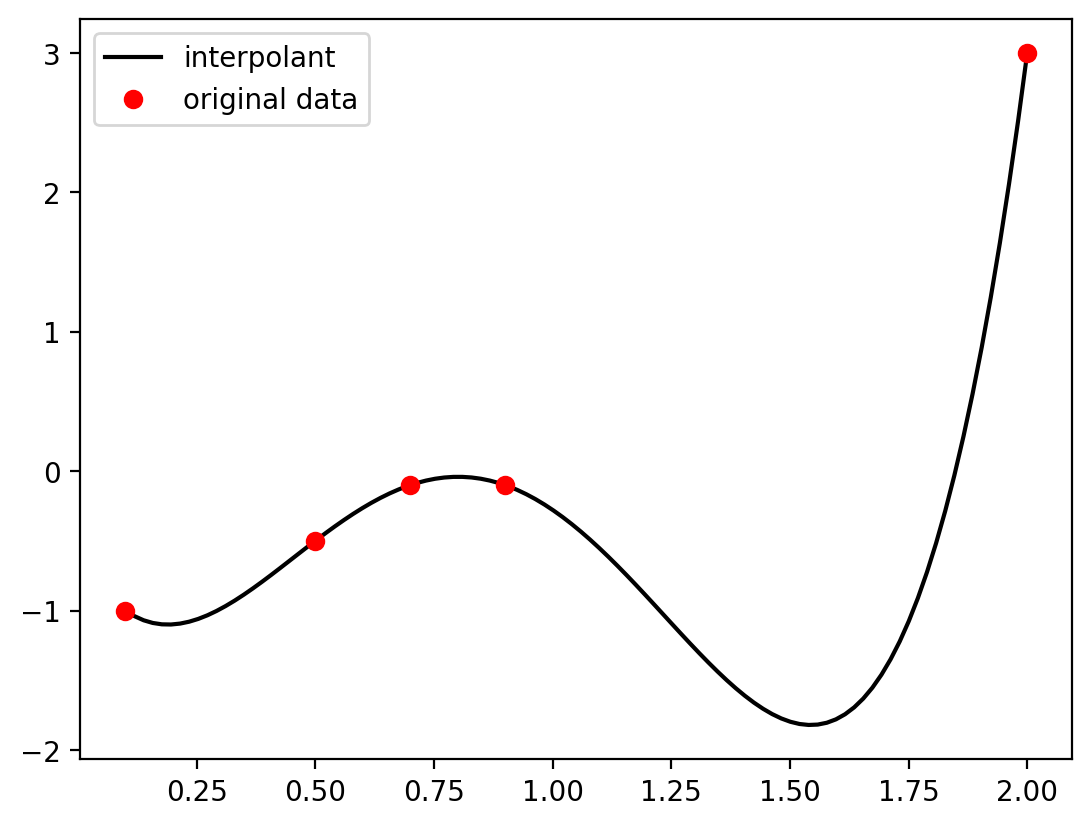

In [20]:
N_interp = 100
x = np.array([0.1, 0.5, 0.7, 0.9, 2])
y = np.array([-1, -0.5, -0.1, -0.1, 3])

c = get_Newton_coefficients(x, y)

x_interp = np.linspace(np.min(x), np.max(x), N_interp)
res = []
for x_ in x_interp:
    res.append(evaluate_Newton_with_Horner(x_, x, c))
res = np.array(res)

# interpolation at data points should return known values
for x_, y_ in zip(x, y):
    print(np.allclose(evaluate_Newton_with_Horner(x_, x, c), y_))

plt.plot(x_interp, res, color="black", label=f"interpolant")
plt.plot(x, y, "o", color="red", label="original data")
plt.legend();

## Interpolation of Lagrange's basis function

True
True
True
True
True
True
True
True
True
True
True


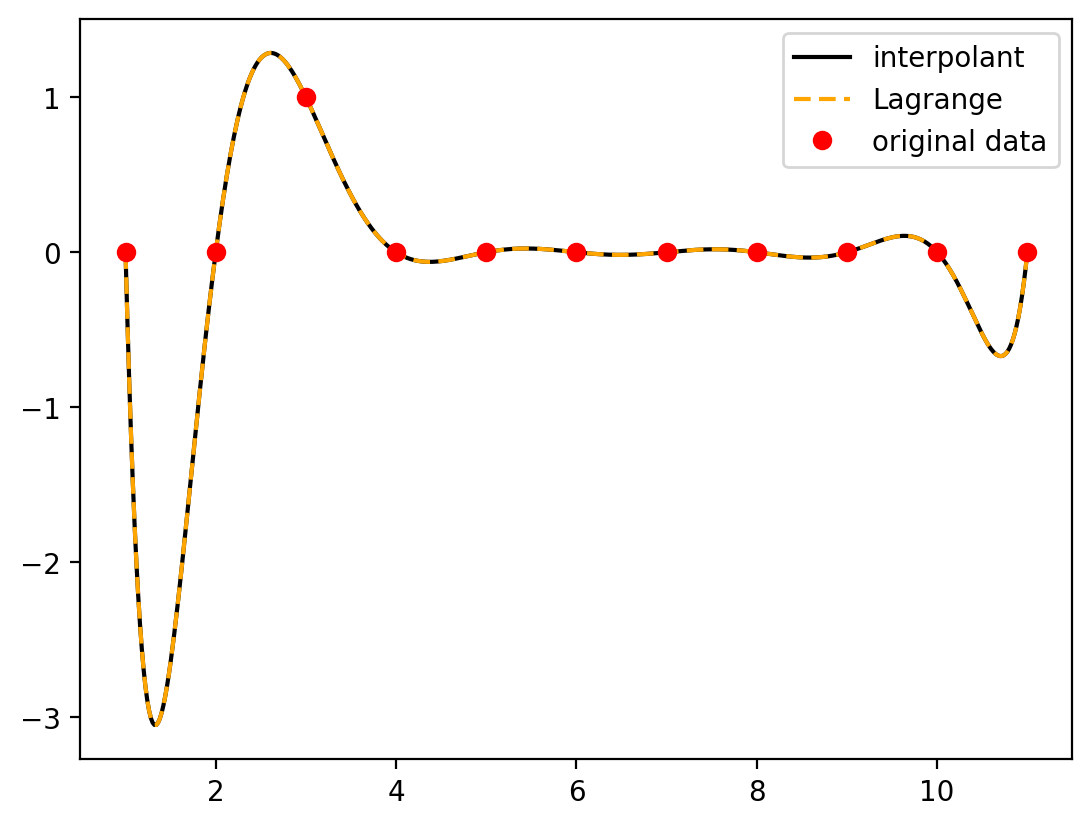

In [21]:
N_interp = 500
x = np.arange(1, 12, dtype=np.float64)
y = np.zeros_like(x)
y[2] = 1.0

c = get_Newton_coefficients(x, y)

x_interp = np.linspace(np.min(x), np.max(x), N_interp)
res = []
for x_ in x_interp:
    res.append(evaluate_Newton_with_Horner(x_, x, c))
res = np.array(res)

# interpolation at data points should return known values
for x_, y_ in zip(x, y):
    print(np.allclose(evaluate_Newton_with_Horner(x_, x, c), y_))

Lagrange = np.prod((x_interp.reshape(-1, 1) - (x[x != x[2]]).reshape(1, -1)) / ((x[2]).reshape(-1, 1) - (x[x != x[2]]).reshape(1, -1)), axis=1)
plt.plot(x_interp, res, color="black", label=f"interpolant")
plt.plot(x_interp, Lagrange, color="orange", dashes=[4, 2, 4, 2], label=f"Lagrange")
plt.plot(x, y, "o", color="red", label="original data")
plt.legend();

# Problem 13

In [22]:
def run_exp(grid_type="uniform", n=11, N_interp=500, compute_residual=True):
    if grid_type == "uniform":
        grid = np.linspace(-4, 4, n)
    else:
        k = np.arange(n)
        grid = 4*np.cos(np.pi*(2*k + 1)/ (2*n))

    y = 1 / (grid**2 + 1)

    x_interp = np.linspace(np.min(grid), np.max(grid), N_interp)
    f_exact = 1 / (x_interp**2 + 1)

    c = get_Newton_coefficients(grid, y)
    f_interp = []
    residual = []
    for x_ in x_interp:

        f_interp.append(evaluate_Newton_with_Horner(x_, grid, c))
        if compute_residual:
            residual.append(np.prod(x_ - grid) / math.factorial(n))
        else:
            pass
    f_interp = np.array(f_interp)
    residual = np.array(residual)

    error = f_exact - f_interp
    return error, f_exact, f_interp, y, residual, x_interp, grid

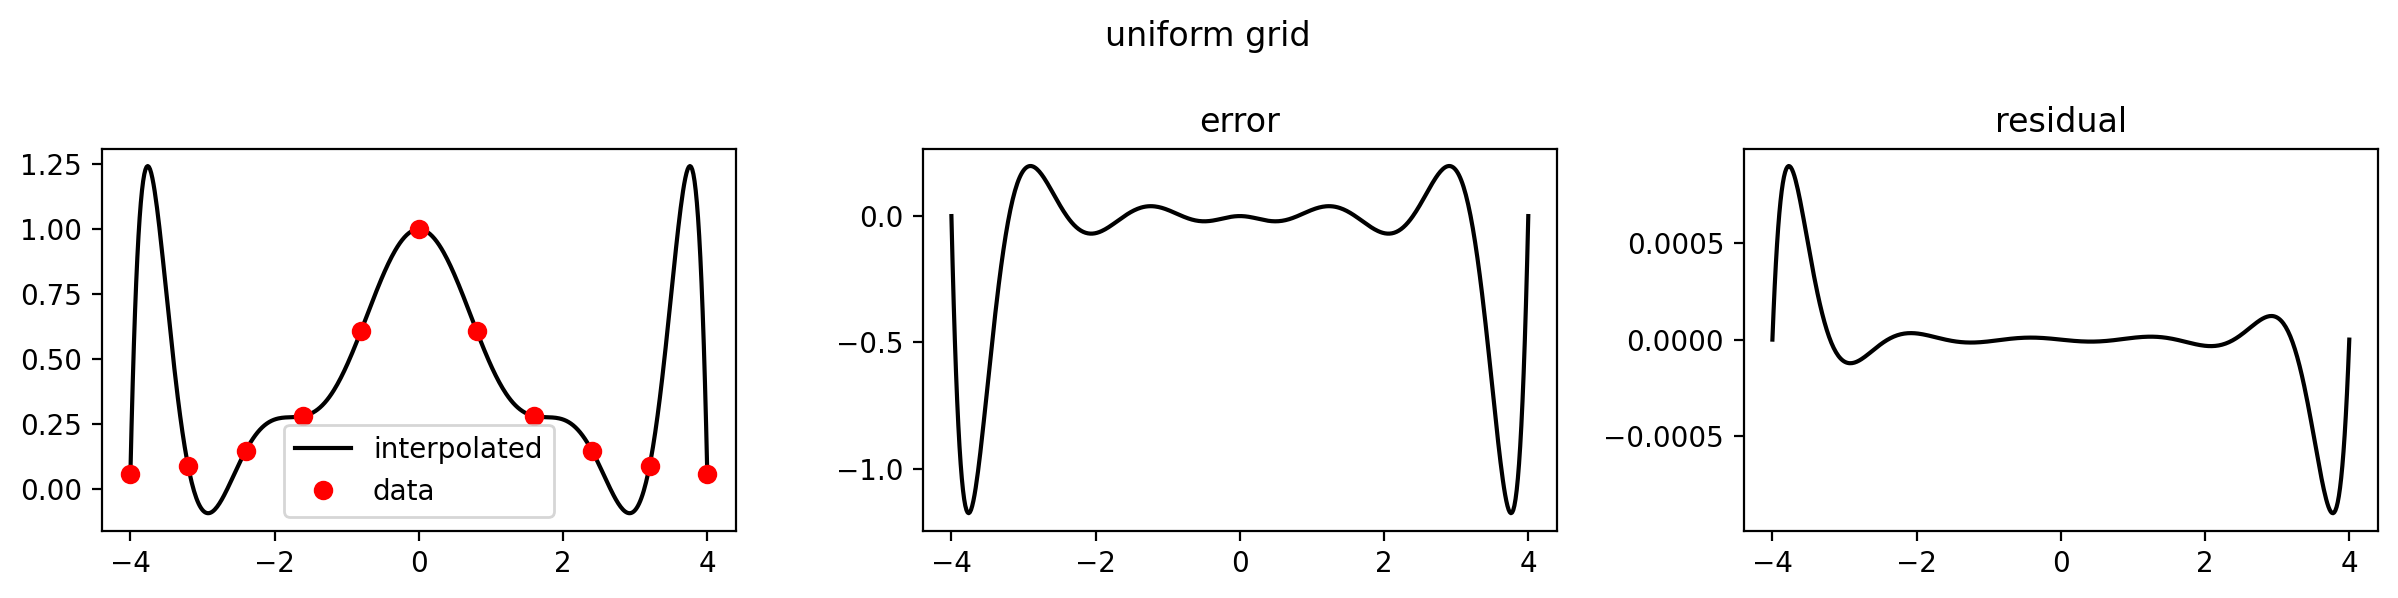

In [23]:
grid_type = "uniform"
error, f_exact, f_interp, y, residual, x_interp, grid = run_exp(grid_type=grid_type)

fig, ax = plt.subplots(1, 3, figsize=(12, 3))
ax[0].plot(x_interp, f_interp, color="black", label="interpolated")
ax[0].plot(grid, y, "o", color="red", label="data")
ax[0].legend()

ax[1].plot(x_interp, error, color="black")
ax[1].set_title("error")
ax[2].plot(x_interp, residual, color="black")
ax[2].set_title("residual")

plt.suptitle(f"{grid_type} grid")
plt.tight_layout();

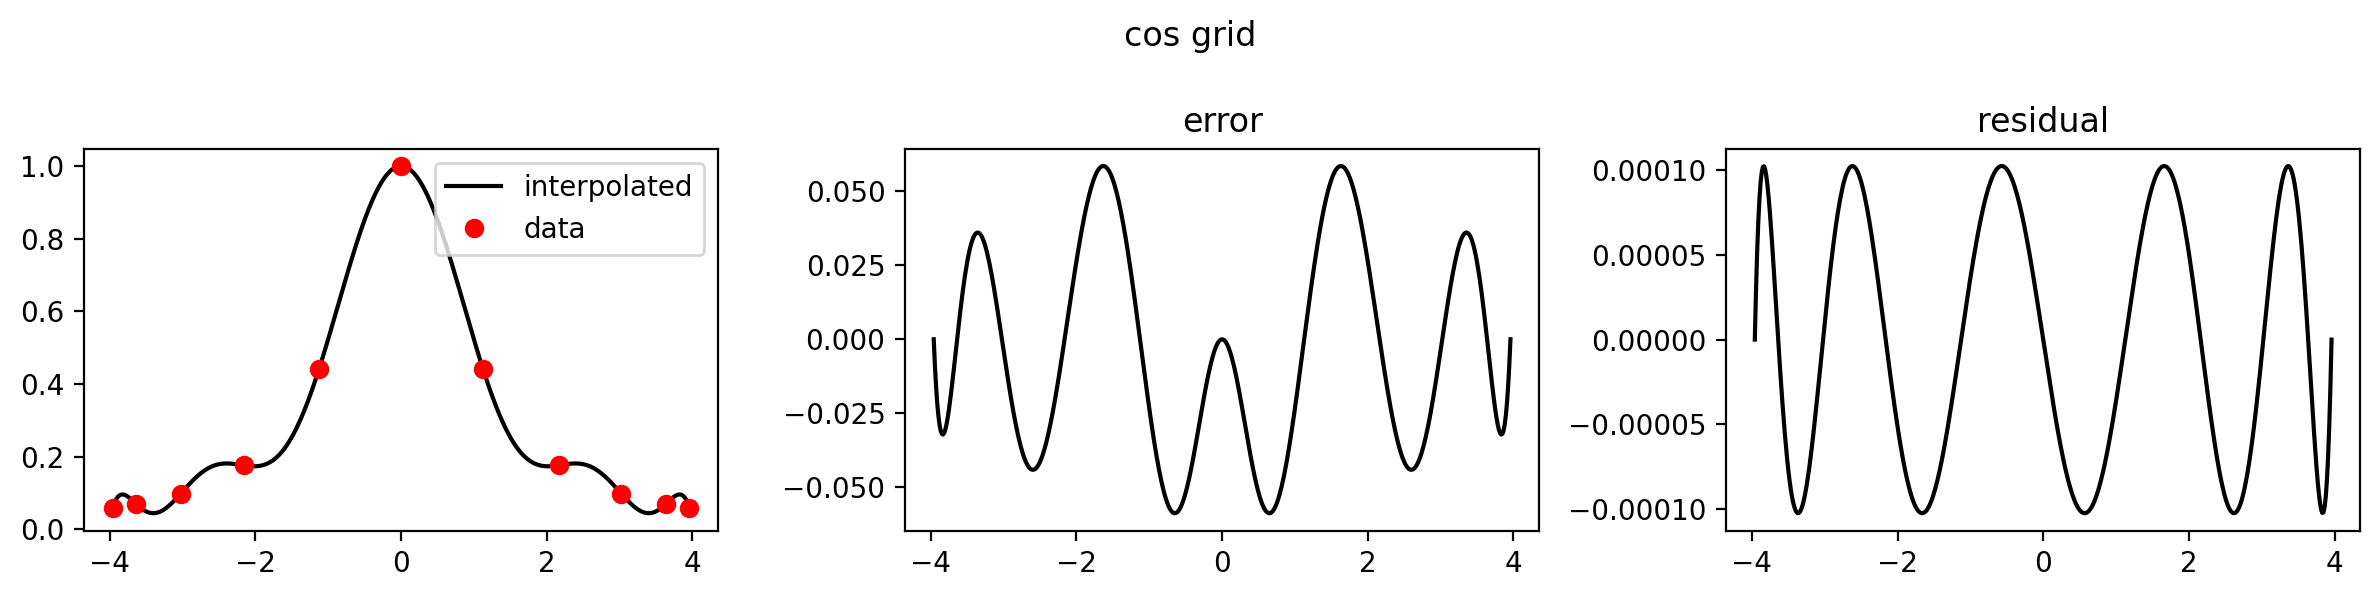

In [24]:
grid_type = "cos"
error, f_exact, f_interp, y, residual, x_interp, grid = run_exp(grid_type=grid_type)

fig, ax = plt.subplots(1, 3, figsize=(12, 3))
ax[0].plot(x_interp, f_interp, color="black", label="interpolated")
ax[0].plot(grid, y, "o", color="red", label="data")
ax[0].legend()

ax[1].plot(x_interp, error, color="black")
ax[1].set_title("error")
ax[2].plot(x_interp, residual, color="black")
ax[2].set_title("residual")

plt.suptitle(f"{grid_type} grid")
plt.tight_layout();

What we see is a [Runge's phenomenon](https://en.wikipedia.org/wiki/Runge%27s_phenomenon). A typical remedy is to use Chebyshev points. One way to explain why Chebyshev points work is to look at the [Peano form of the remined](https://en.wikipedia.org/wiki/Taylor%27s_theorem#Taylor's_theorem_in_one_real_variable). We see that for uniform grid it peaks near ends of the interval and for the Chebyshev grid it is unigormly small.

Lets see what happens when we use more points.

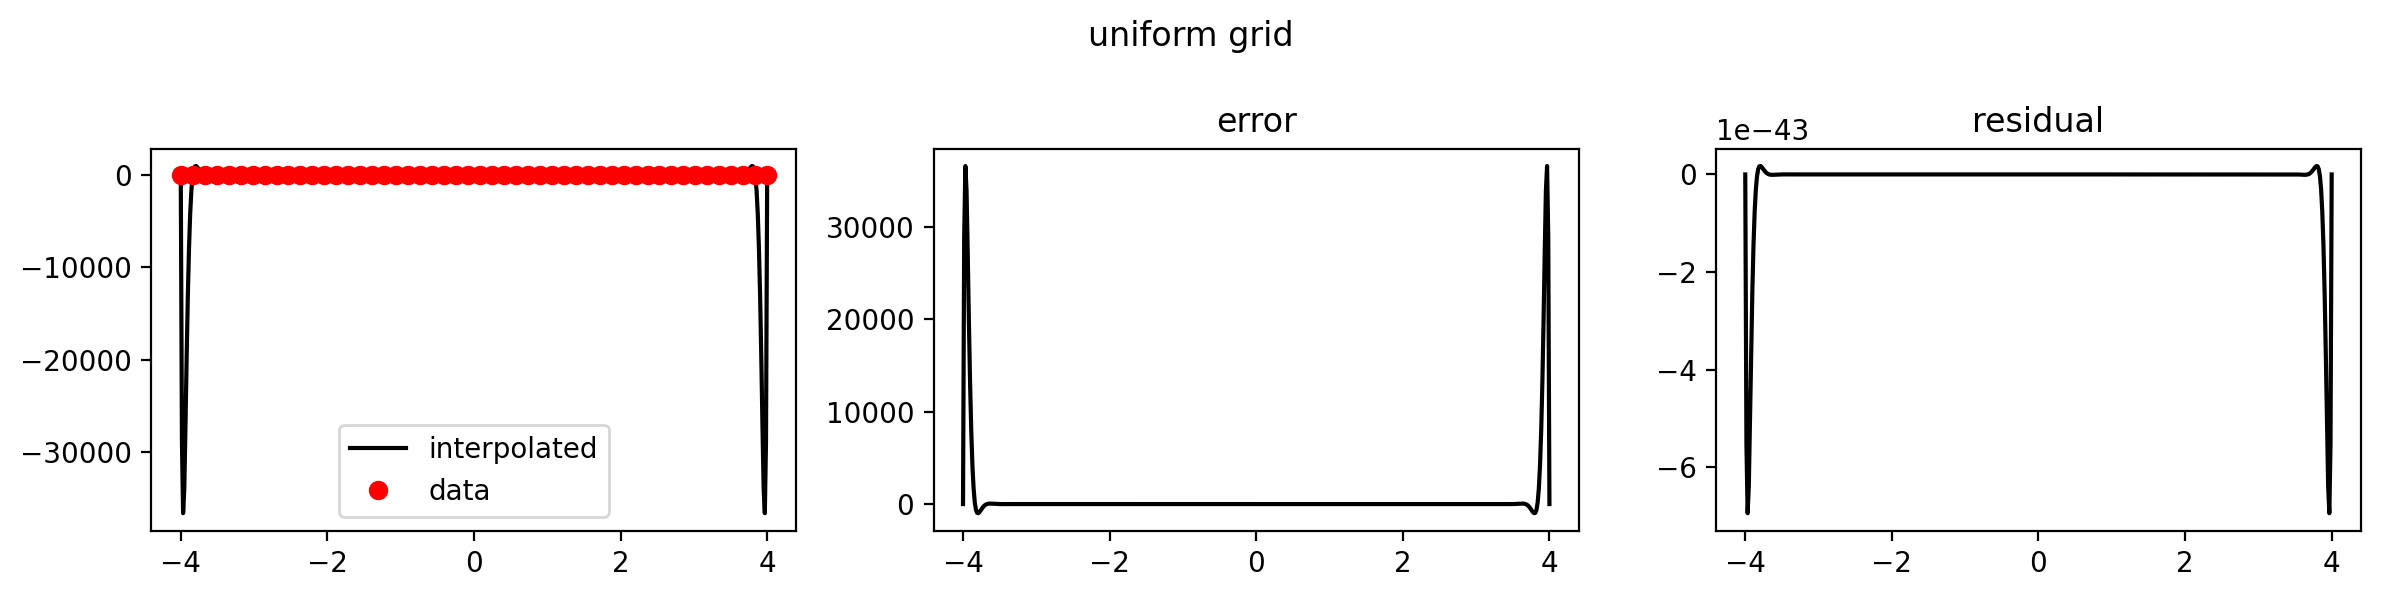

In [25]:
grid_type = "uniform"
error, f_exact, f_interp, y, residual, x_interp, grid = run_exp(grid_type=grid_type, n=50)

fig, ax = plt.subplots(1, 3, figsize=(12, 3))
ax[0].plot(x_interp, f_interp, color="black", label="interpolated")
ax[0].plot(grid, y, "o", color="red", label="data")
ax[0].legend()

ax[1].plot(x_interp, error, color="black")
ax[1].set_title("error")
ax[2].plot(x_interp, residual, color="black")
ax[2].set_title("residual")

plt.suptitle(f"{grid_type} grid")
plt.tight_layout();

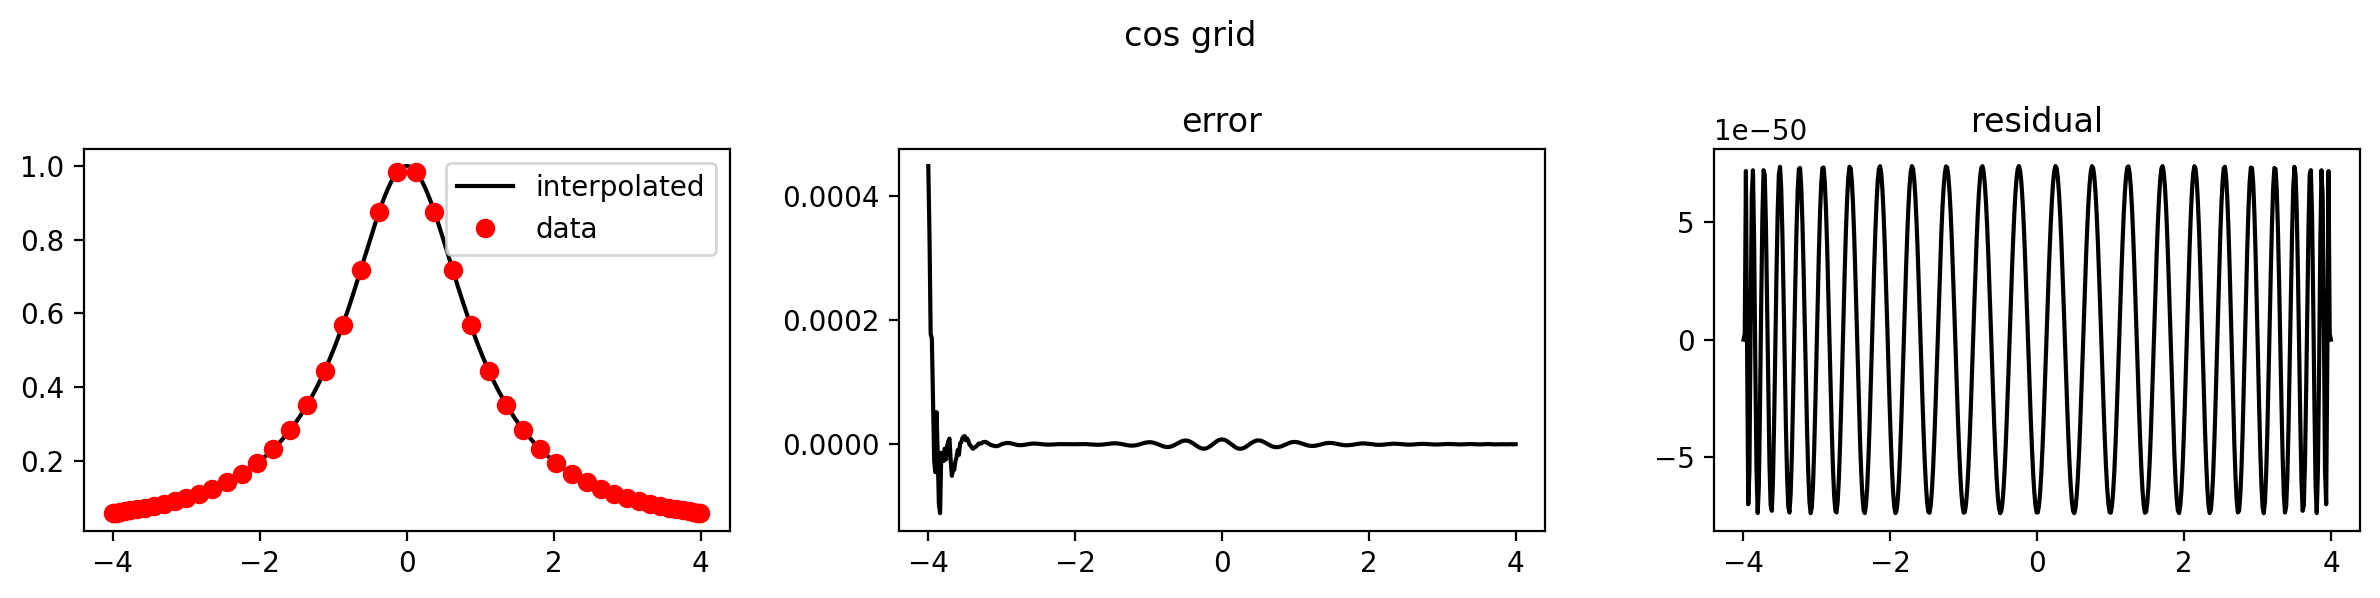

In [26]:
grid_type = "cos"
error, f_exact, f_interp, y, residual, x_interp, grid = run_exp(grid_type=grid_type, n=50)

fig, ax = plt.subplots(1, 3, figsize=(12, 3))
ax[0].plot(x_interp, f_interp, color="black", label="interpolated")
ax[0].plot(grid, y, "o", color="red", label="data")
ax[0].legend()

ax[1].plot(x_interp, error, color="black")
ax[1].set_title("error")
ax[2].plot(x_interp, residual, color="black")
ax[2].set_title("residual")

plt.suptitle(f"{grid_type} grid")
plt.tight_layout();

For Chebyshev grid error decreases more or less uniformly, for uniform grid peaks keep increasing.